# *Anticipating Homelessness: A Machine Learning Approach To Prediction*



# DESCRIPTION


---




As international students living in the downtown area of a renowned city, the members, Sakshi and Poojan, of this team, Team Duos, were taken aback by the extreme incidences of homelessness plaguing the heart of the city.


As this issue has a direct impact not only on our own experiences but also on the welfare of the community in which we live, we made the collective decision to apply the insights acquired through our Machine Learning course to uncover the underlying factors contributing to this problem.

## Team Members:


1.   Sakshi Kekre
2.   Poojan Shah



## Questions, Experiments and Roles


1.   What are some commonalities noticed (clearly visible or hidden) in characteristics of individuals experiencing homeless situations? Can these similarities help in identifying 'at risk' groups in communities?
      
  Experiments:
      a. Clustering to identify common characteristics for finding 'at risk' groups, and
      b. Regression to uncover hidden patterns or associations between these characteristics on the state of continuing to remain homeless
      
  **Sakshi**: K-Means and Agglomerative using sklearn, Hierarchical using scipy, GMM using sklearn, MLP using keras

  **Poojan**: K-Mean Using sklearn and tensorflow, GMM using sklearn, Muller loop for regression, MLP using keras


2.   What role does drug abuse play in causing homelessness? Does it have any negative impact on the probability of improvement in the condition of an individual experiencing homelessnes?

  Experiment: Classification to obeserve and uncover patterns in use of drugs and determine its imapct on the conditions of homeless individuals

  **Sakshi**: Identification of latent manifold, Decision tree classifier using sklearn, data distribution using matplotlib

  **Poojan**: Random forest classifier using sklearn, Muller loop for classification, data visualization using seaborn




# DATA


---


## *Datasets*

We began our search for datasets related to homelessness on government and NGO websites. However, due to privacy related challenges, all available data was in the form of statistical data.

The experiments we wanted to perform, such as clustering, classification and regression, was not possible on this aggregated data. And it was difficult to gain access to individual profile data.

Thus, we settled with a kaggle repository for our base dataset. All other datasets are raw and scraped from the web.

1.  Dataset 1: Base dataset - information about individual profiles (age, gender, income, veteran status, drug abuse, and more) experiencing homelessness

  Source: https://www.kaggle.com/datasets/rezag7/homeless-dataset

2.  Dataset 2 and 3: Drug use - type of drug used and frequency of use

  Source: https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified

3.  Dataset 4: Information on housing data - statewise average income required to be able to own a house in that state

  Source: https://nlihc.org/oor


## *Amalgamation:*

* Dataset 2 and 3 had information about the drugs used by certain age groups and the frequency with which these were used. We joined this information with the base dataset (mapped on age column) to gain some perspective on drug usage for our homeless individuals. After this amalgamation, the performance of classifiers improved notably for some models.

* Dataset 4 had information about the minimum wages a person needs to earn in order to have the capacity to own a home in the state this individual is residing in. We joined the wage info from this dataset to our base dataset on the 'state' column to add a feature in our data. This amalgamation helped improve classifier's performance.

# EDAV

Goals:

1) Understanding the Data: Get a sense of the data's content, structure, and quality. What are the features, their data types, and their distributions?

2) Detecting Anomalies: Identify and handle missing values, outliers, and inconsistencies in the data.

3) Exploring Relationships: Examine the relationships and correlations between variables to identify potential patterns and trends.

4) Feature Selection: Decide which features are most relevant for modeling and which might need further engineering or transformation.

5) Visualize Data: Create various visualizations to better understand data distributions, relationships, and trends.

---
#Data Analysis

Goals:

1) Data Collection: Gather a dataset containing information on houses, including features like size, location, price, and more.

2) Data Exploration: Explore the dataset to get an initial understanding of the data. You may check the first few rows, summary statistics, and data types of the columns.

3) Data Cleaning: Identify and handle missing values, outliers, and duplicates in the dataset. For example, you might replace missing values with the mean or median, remove outliers, and drop duplicate entries.

4) Feature Selection: Analyze the relevance of features by calculating correlations, performing feature importance analysis, and selecting the most informative ones. You might also engineer new features based on domain knowledge.

5) Data Visualization: Create visualizations to better understand the data and relationships between features. For example, you can use scatter plots to show the relationship between house size and price, or bar charts to display the distribution of houses by neighborhood.

6) Data Preprocessing: Encode categorical variables using techniques like one-hot encoding or label encoding. Normalize or standardize numerical features to bring them to a similar scale.

7) Train-Test Split: Split the dataset into a training set and a test set. The training set is used to train the machine learning model, and the test set is used to evaluate its performance.

8) Model Building: Choose an appropriate machine learning algorithm, like linear regression, decision trees, or random forests, and train the model on the training data.

9) Model Evaluation: Evaluate the model's performance using appropriate metrics (e.g., mean squared error for regression problems). Visualize the results, such as plotting the predicted house prices against the actual prices.

10) Hyperparameter Tuning: Fine-tune the model by adjusting hyperparameters, using techniques like cross-validation. Visualize how different hyperparameters impact model performance.

11) Model Interpretation: Use techniques like SHAP values or feature importance plots to understand how the model makes predictions. Visualize which features have the most influence on house price predictions.

12) Final Model and Deployment: Once satisfied with the model's performance, finalize it and deploy it for making predictions on new, unseen data.


#Visualization

Goals/Tools:
1)Scatter Plots: Scatter plots display individual data points on a two-dimensional plane, with one variable on the x-axis and another on the y-axis. They are used to show the relationship or distribution between two variables.

2)Line Charts:
 Line charts are used to visualize trends in data over time or across a continuous variable. They are common in time series analysis.

3)Bar Charts:
Bar charts are used to compare categorical data by showing the frequency or distribution of each category as bars.

4)Histograms:
Histograms display the distribution of a continuous variable by dividing it into bins and showing the frequency of data points within each bin.

5)Box Plots:
Box plots provide a graphical summary of the distribution of data, including the median, quartiles, and potential outliers.


Libraries

In [200]:
!pip install -U -q PyDrive
!pip install kmeans-pytorch
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sb

<ipython-input-200-546f29400acd>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [201]:
# Authenticate and PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Loading All Data File

In [202]:
id='1RjuRaiPRm6Cc5ibxhd6Y939Dy8E5OyOL'

In [203]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('homelessProfiles.csv')
data = pd.read_csv('homelessProfiles.csv')



Viewing all columns and determining relevant features for clustering and classification

In [204]:
data.head()

,CLIENT_KEY,AGE,GENDER,VETERAN,INCOME,NIGHTS,substanceabuse,completed,probation,assistancetype,required,State
0,256172,20,Female,No,0.0,152.0,0,0,1,tempassistance,1,Arizona
1,221079,20,Female,No,740.0,229.0,0,1,0,tempassistance,1,Louisiana
2,243074,21,Female,No,0.0,105.0,1,1,0,tempassistance,1,Washington
3,129974,21,Female,No,0.0,371.0,1,1,0,tempassistance,1,Vermont
4,226596,22,Female,No,0.0,169.0,0,0,0,tempassistance,1,Idaho


For clustering, we see that age and income can be relevant, so we only use these features.

For classification and regression, we will drop unwanted features like client key, probtion, required and state.

Checking for and null values and dropping them from dataframe if insignificant in number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CLIENT_KEY      242 non-null    int64  
 1   AGE             242 non-null    int64  
 2   GENDER          242 non-null    object 
 3   VETERAN         242 non-null    object 
 4   INCOME          242 non-null    float64
 5   NIGHTS          236 non-null    float64
 6   substanceabuse  242 non-null    int64  
 7   completed       242 non-null    int64  
 8   probation       242 non-null    int64  
 9   assistancetype  242 non-null    object 
 10  required        242 non-null    int64  
 11  State           242 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 22.8+ KB


<Axes: >

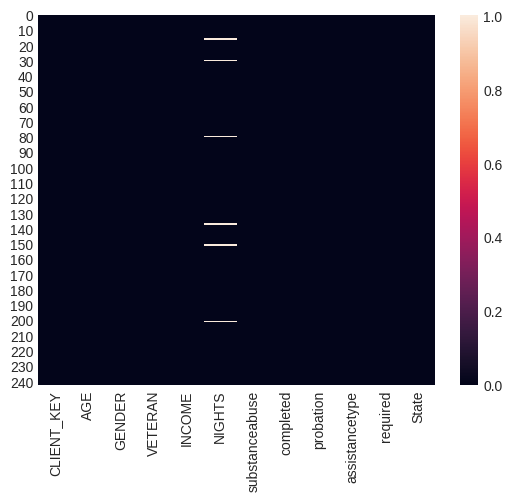

In [205]:
data.info()
sb.heatmap(data.isnull())

In [206]:
data.dropna(inplace=True)

##Visualizing Data: Age, Income, Nights spent homeless

View distributions of all relevant features to understand more about our dataset

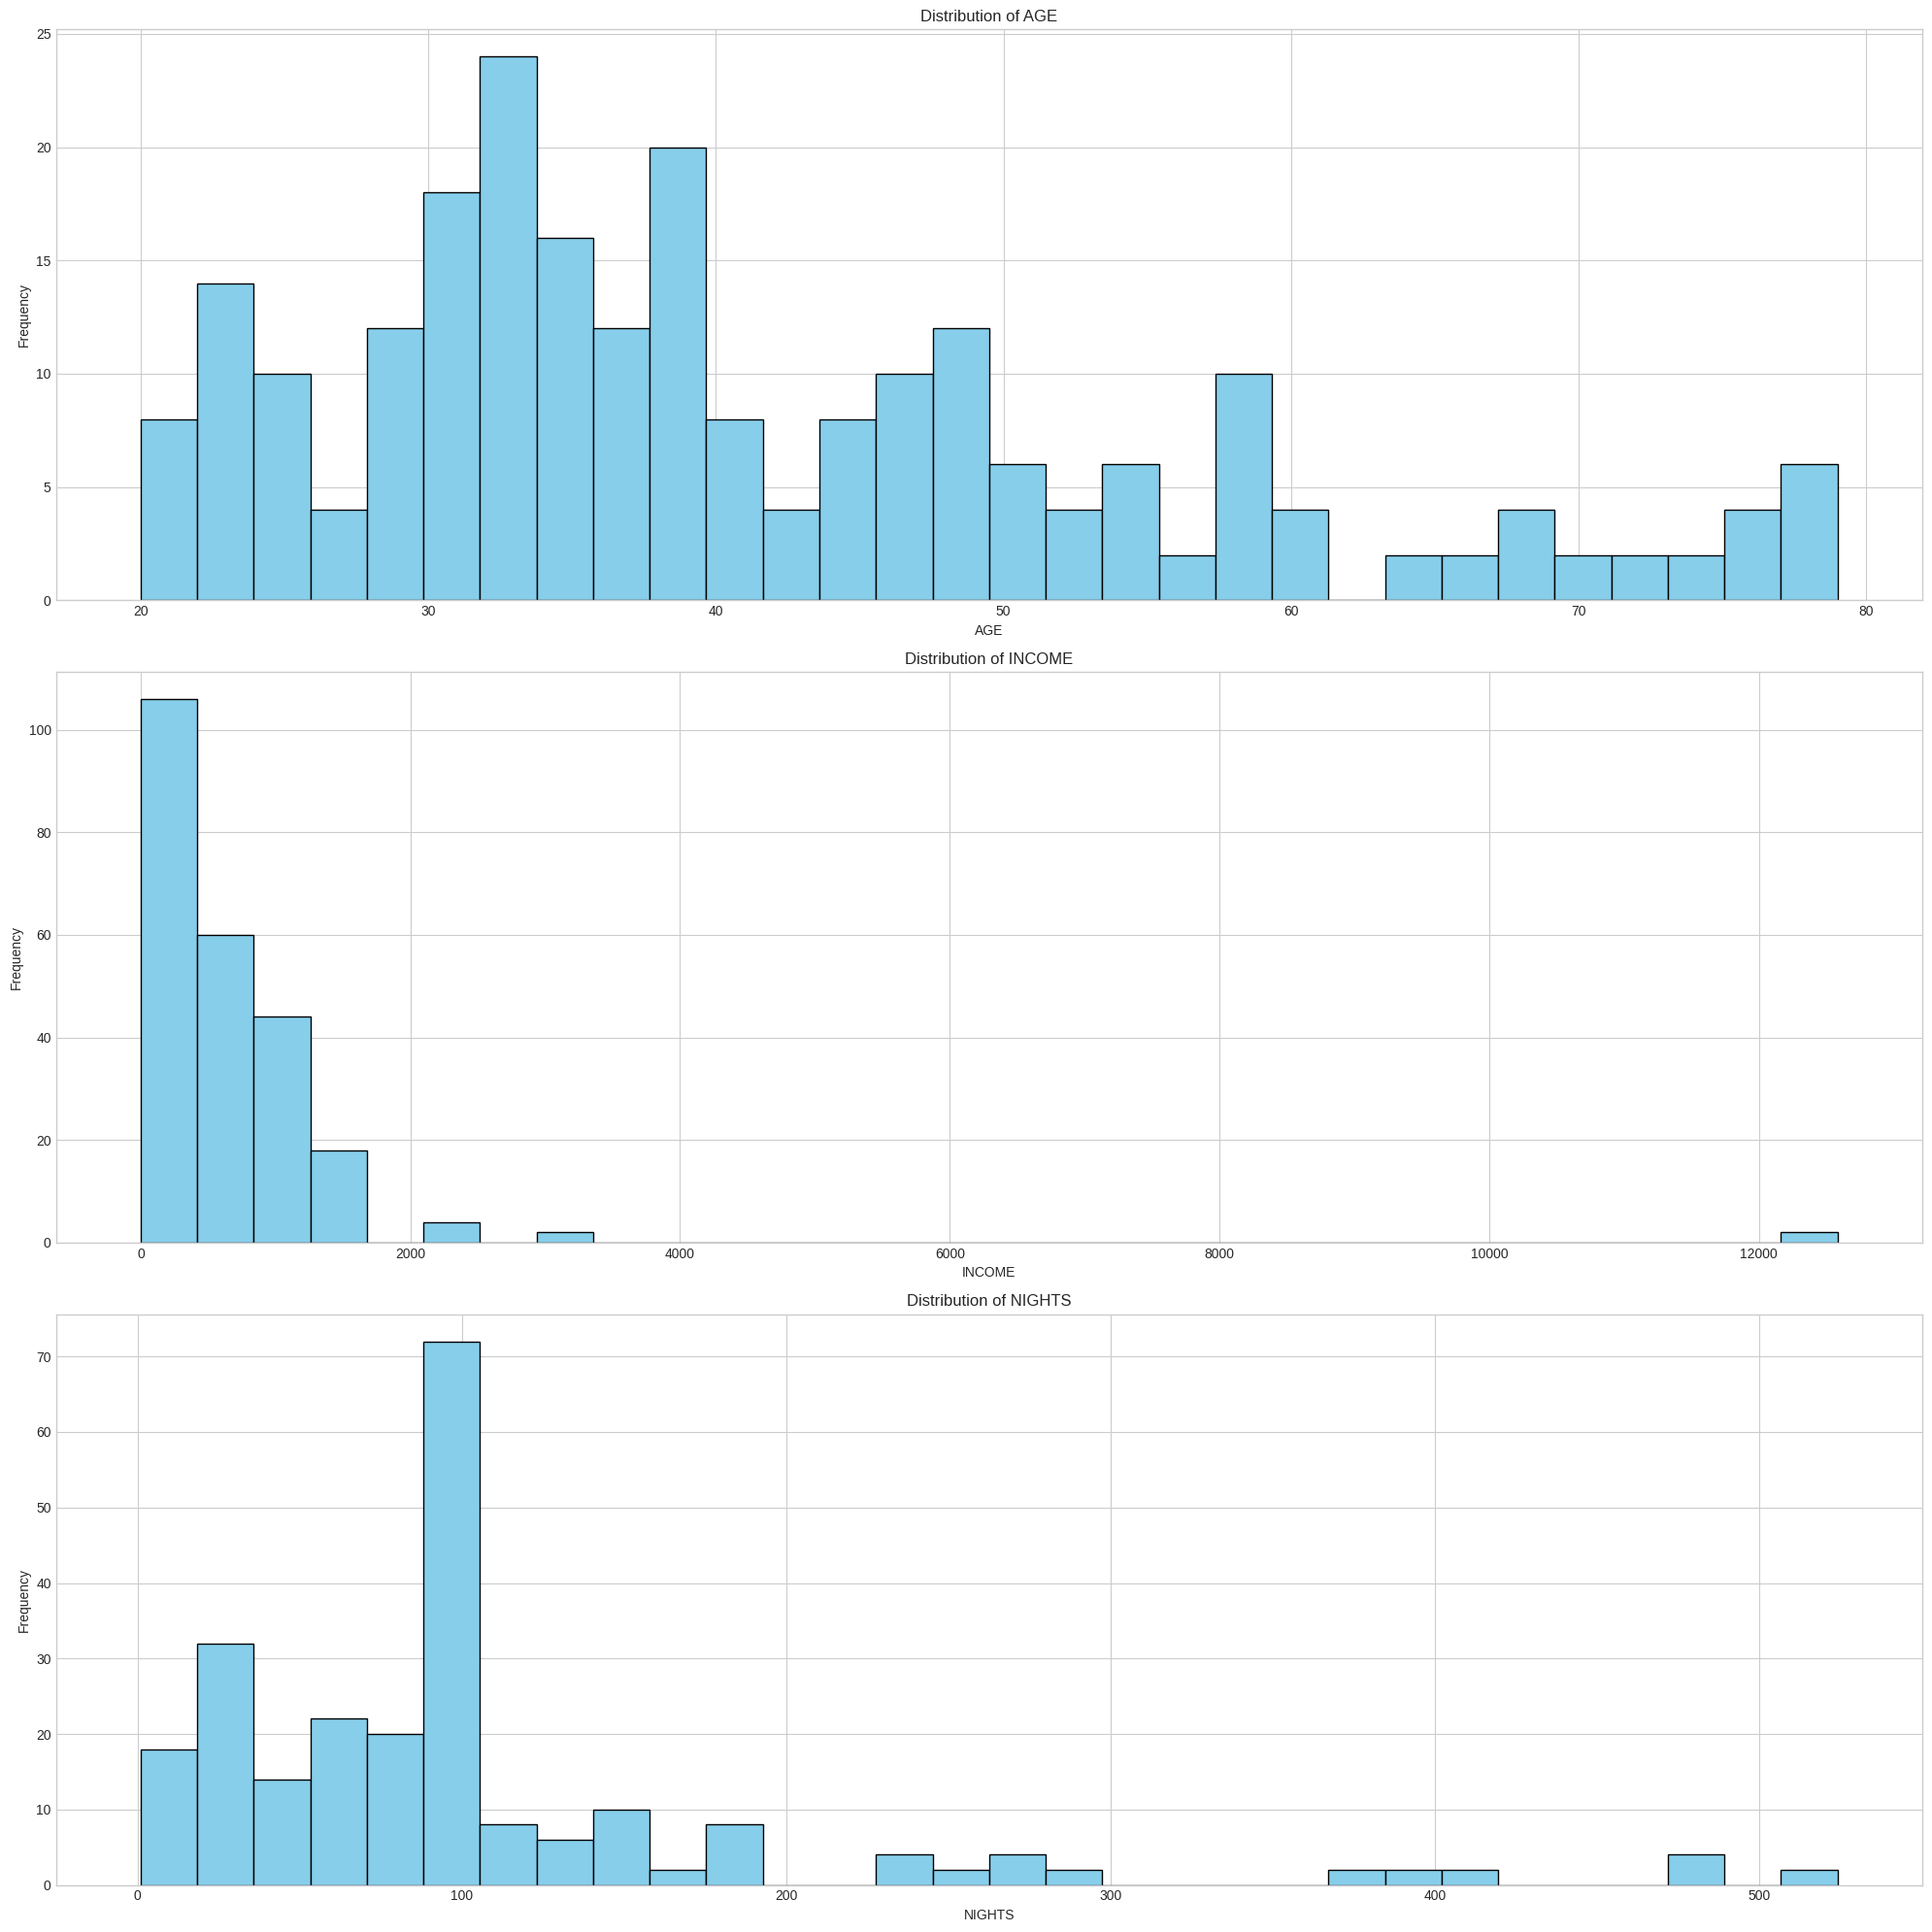

In [207]:
# Select relevant features for visualization
features_to_visualize = ['AGE', 'INCOME', 'NIGHTS']

# Create histograms for each feature
plt.figure(figsize=(20, 20))
for i, feature in enumerate(features_to_visualize):
    plt.subplot(3, 1, i + 1)
    plt.hist(data[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Remove outlier data that could potentially be errorneous

In [208]:
# Define outlier removal condition
condition = (data['INCOME'] < 6000 )

# Apply the condition to filter the DataFrame
filtered_df = data[condition]

# Reset the index of the filtered DataFrame
filtered_df.reset_index(drop=True, inplace=True)

Re-plotting after outlier removal

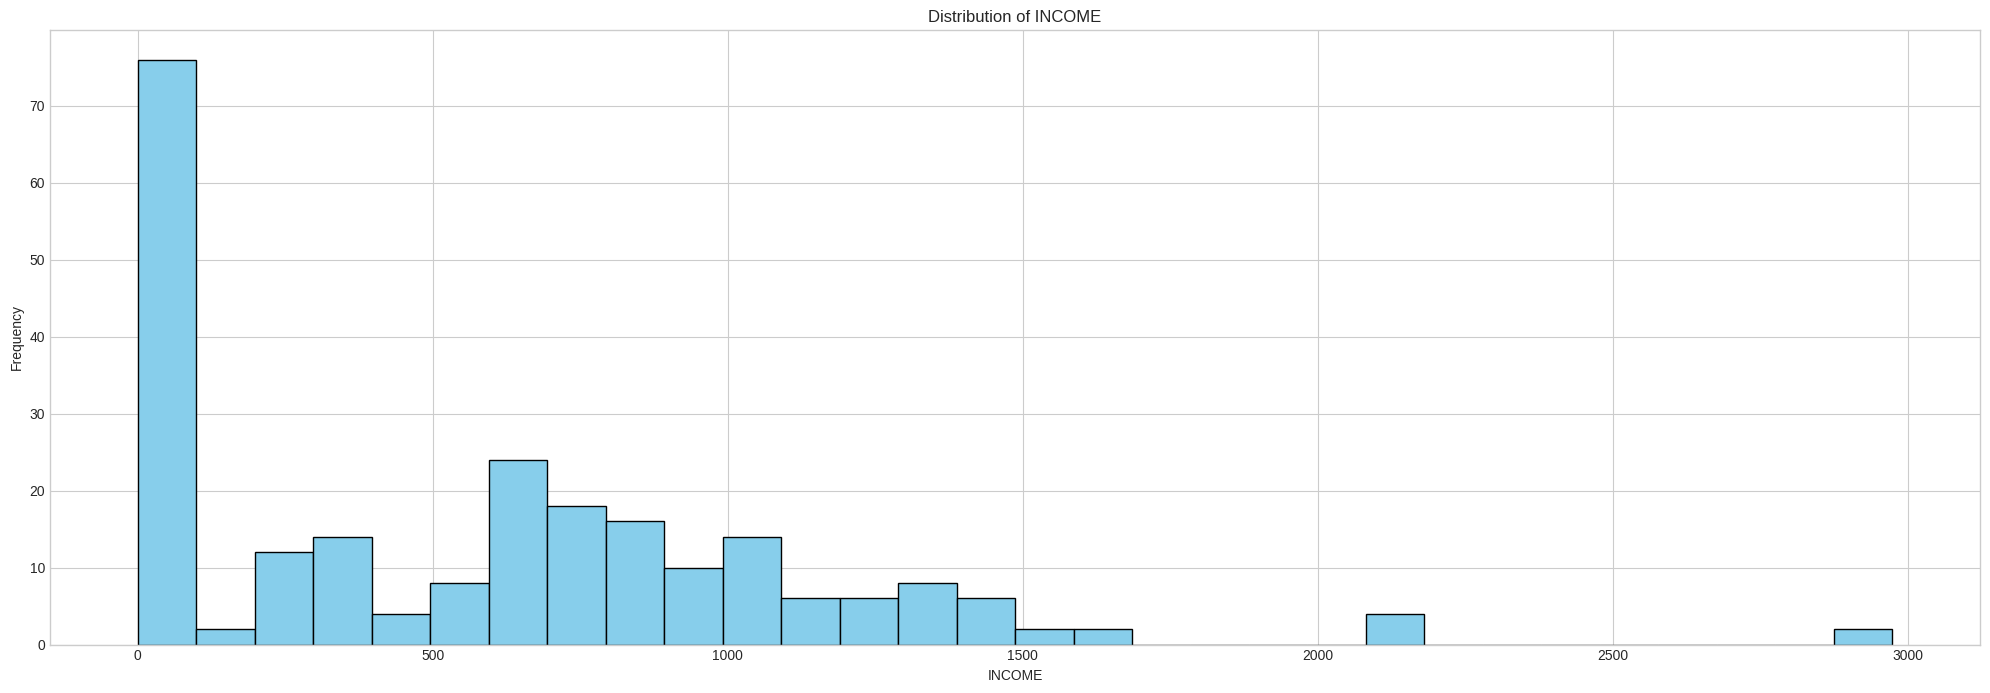

In [209]:
# Select relevant features for visualization
features_to_visualize = ['INCOME']

# Create histograms for each feature
plt.figure(figsize=(20, 20))
for i, feature in enumerate(features_to_visualize):
    plt.subplot(3, 1, i + 1)
    plt.hist(filtered_df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [210]:
filtered_df.head()

,CLIENT_KEY,AGE,GENDER,VETERAN,INCOME,NIGHTS,substanceabuse,completed,probation,assistancetype,required,State
0,256172,20,Female,No,0.0,152.0,0,0,1,tempassistance,1,Arizona
1,221079,20,Female,No,740.0,229.0,0,1,0,tempassistance,1,Louisiana
2,243074,21,Female,No,0.0,105.0,1,1,0,tempassistance,1,Washington
3,129974,21,Female,No,0.0,371.0,1,1,0,tempassistance,1,Vermont
4,226596,22,Female,No,0.0,169.0,0,0,0,tempassistance,1,Idaho


Box plotting to see distributions

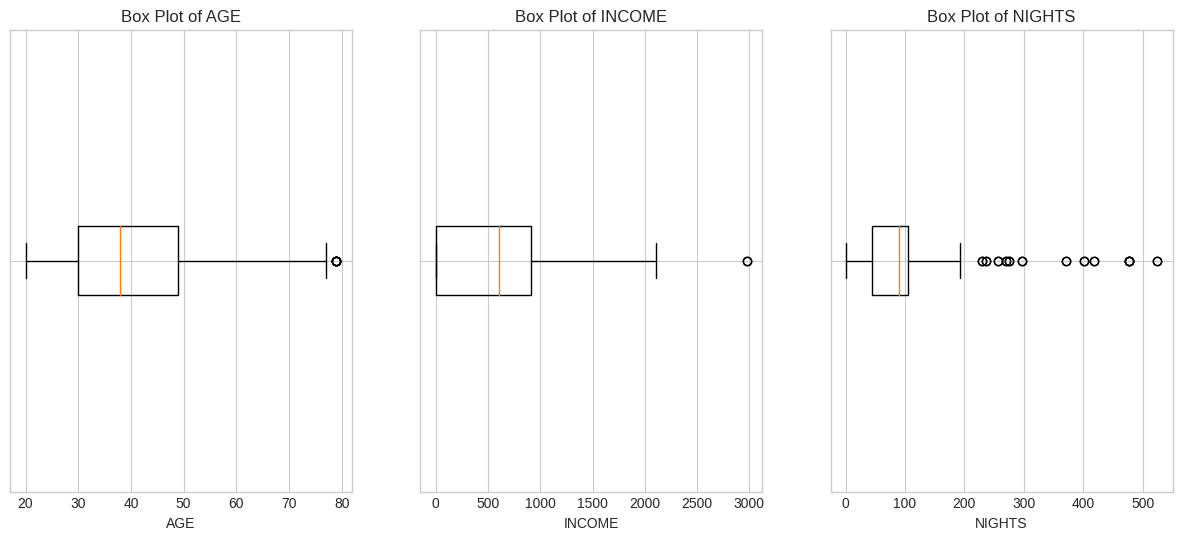

In [211]:
variables = ['AGE', 'INCOME', 'NIGHTS']

# Create subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(15, 6))

for i, variable in enumerate(variables):
    axes[i].boxplot(filtered_df[variable], vert=False)
    axes[i].set_title(f'Box Plot of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_yticklabels([])  # Remove y-axis labels

plt.show()

# MODELS


---



###K-Mean Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

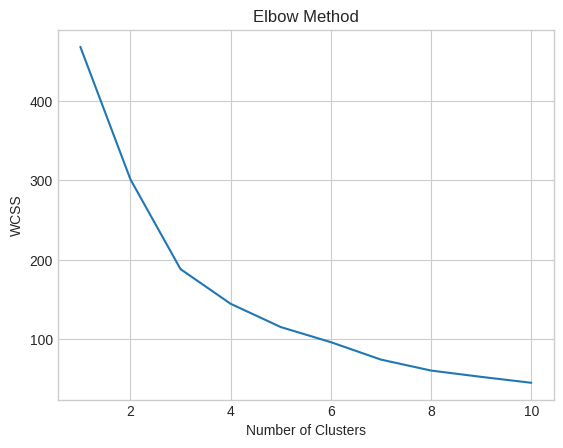

In [212]:
# Select relevant features for clustering
tmp = filtered_df[['AGE', 'INCOME']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tmp)
X = X_scaled

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters= i , init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Taking n=3 based on the elbow point

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


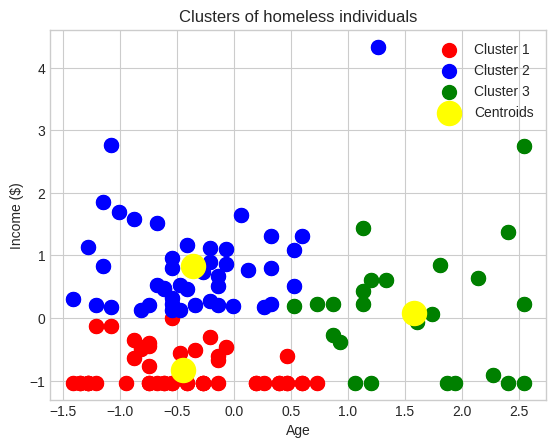

In [213]:
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of homeless individuals')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

### Hierarchical - using scipy

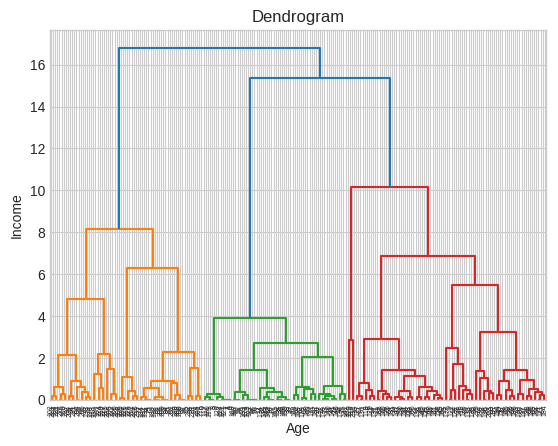

In [214]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

### Agglomerative - using sklearn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


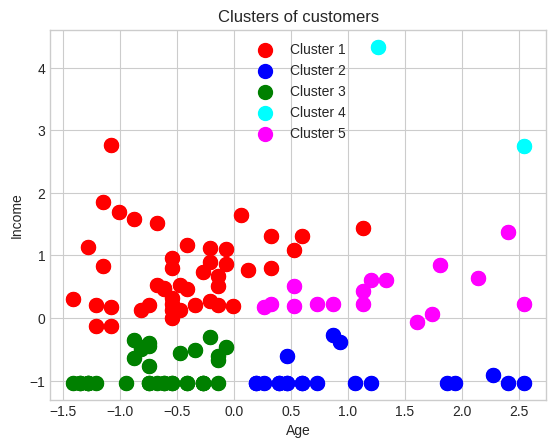

In [215]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

### GMM Clustering

In [216]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
# df_encoded = df_encoded.drop('Class', axis=1)
selected_cols = data[['AGE', 'INCOME']]
data_scaled = scaler.fit_transform(selected_cols)

# Apply the Gaussian Mixture Model
gmm = GaussianMixture(n_components=2)
gmm.fit(data_scaled)

# Predict the clusters for each data point
clusters = gmm.predict(data_scaled)

# Add the predicted clusters to the dataframe
data['Cluster'] = clusters

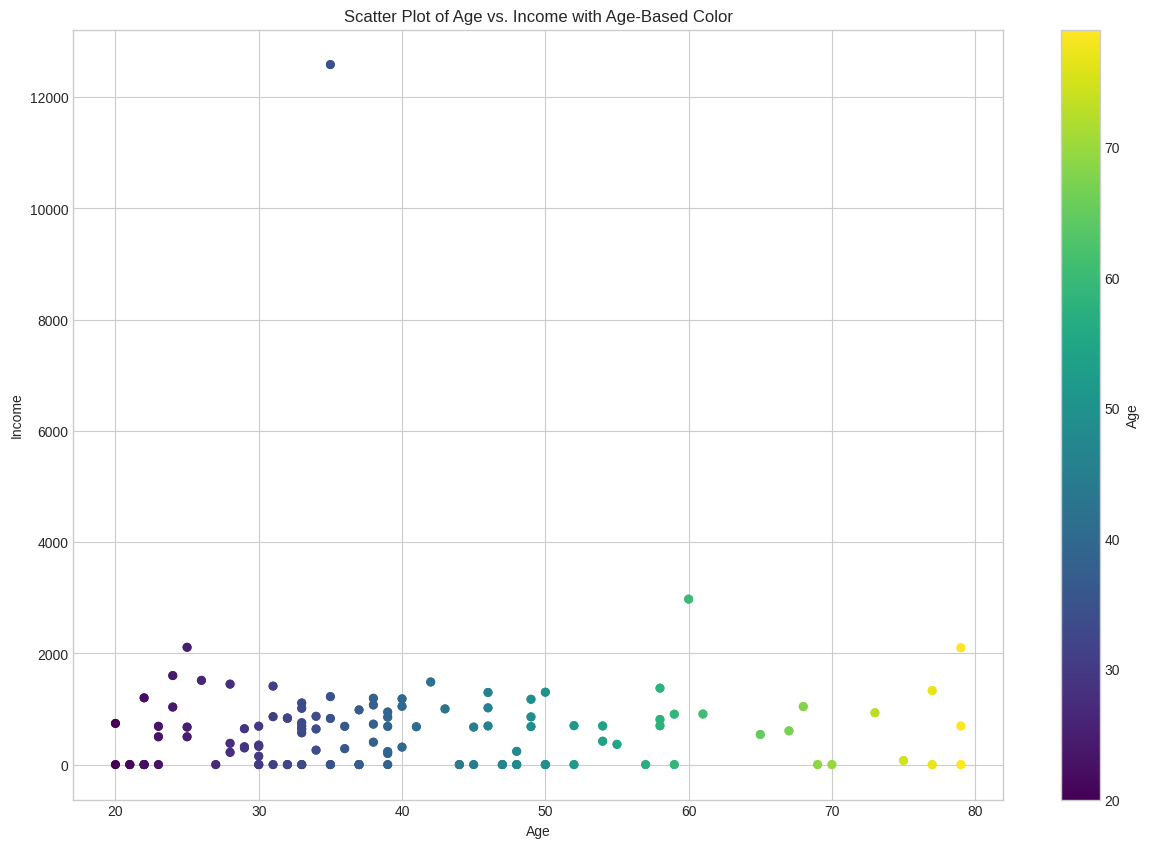

In [217]:
homeless_prep = data
plt.figure(figsize=(15, 10))
plt.scatter(homeless_prep['AGE'], homeless_prep['INCOME'], c=homeless_prep['AGE'], cmap='viridis', s=30)  # Adjust s (size) as needed
plt.colorbar(label='Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot of Age vs. Income with Age-Based Color')
plt.show()

### Fractal Clustering:

Loading and pre-processing data

In [218]:
id='17kcPvYhMKwEarS1978L5vuSwOa9x_SKN'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('homeless.csv')
data = pd.read_csv('homeless.csv')
# data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CLIENT_KEY      242 non-null    int64  
 1   AGE             242 non-null    int64  
 2   GENDER          242 non-null    object 
 3   VETERAN         242 non-null    object 
 4   INCOME          242 non-null    float64
 5   NIGHTS          236 non-null    float64
 6   substanceabuse  242 non-null    int64  
 7   completed       242 non-null    int64  
 8   probation       242 non-null    int64  
 9   assistancetype  242 non-null    object 
 10  required        242 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 20.9+ KB


Initial cluster plotting to see clusters

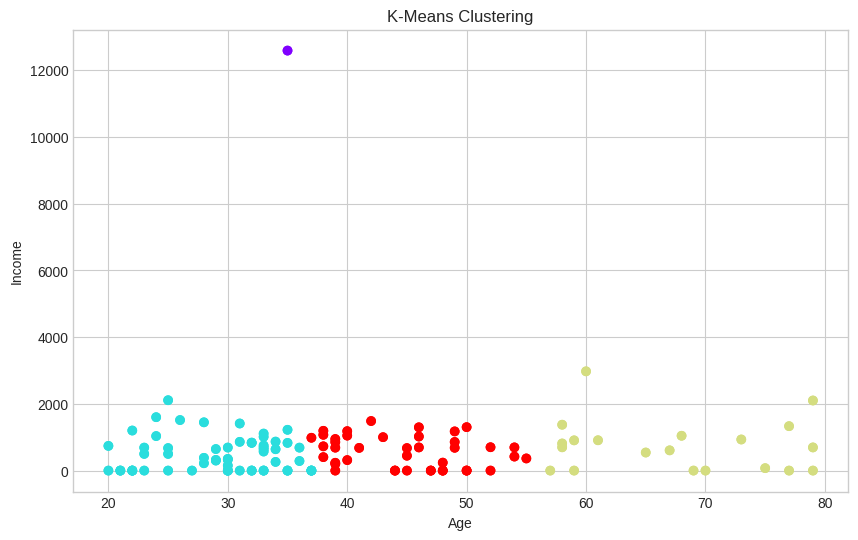

In [219]:
# Select relevant features for clustering
X = data[['AGE', 'INCOME']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means Clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the dataset
data['KMeans_Cluster'] = cluster_labels

# Visualization of K-Means Clusters
# ccmap = plt.get_cmap('tab20')
plt.figure(figsize=(10, 6))
plt.scatter(X['AGE'], X['INCOME'], c=cluster_labels,cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-Means Clustering')

# Add color labels for clusters
# for i in range(cluster_labels.max()+1):
#     plt.scatter([], [], label='Cluster {}'.format(i), color=ccmap(i))


# Calculate cluster statistics
cluster_stats = data.groupby('KMeans_Cluster').agg({
    'AGE': 'mean',
    'INCOME': 'mean',
    'NIGHTS': 'mean',
    'CLIENT_KEY': 'count'
}).reset_index()

Objective Function


* We now try to identify which cluster to target next
* By looking at the cluster statistics in below plot, we can say that the cluster 3 can be our target group as it has the youngest group of people with most nights spent as homeless. An intervention for people in this cluster would have the most impact


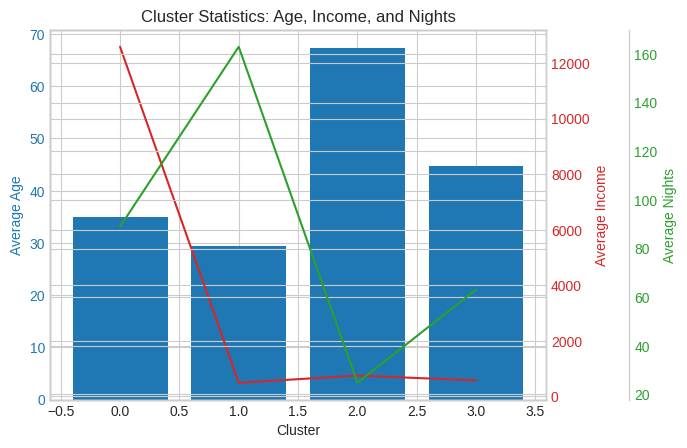

In [220]:
import matplotlib.pyplot as plt

# Extract data
clusters = cluster_stats['KMeans_Cluster']
age_mean = cluster_stats['AGE']
income_mean = cluster_stats['INCOME']
nights_mean = cluster_stats['NIGHTS']

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# First plot: Average Age as a bar plot
color = 'tab:blue'
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Average Age', color=color)
ax1.bar(clusters, age_mean, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis
ax2 = ax1.twinx()

# Second plot: Average Income as a line plot
color = 'tab:red'
ax2.set_ylabel('Average Income', color=color)
ax2.plot(clusters, income_mean, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Third plot: Average Nights as a line plot with a secondary y-axis
ax3 = ax1.twinx()
color = 'tab:green'
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Average Nights', color=color)
ax3.plot(clusters, nights_mean, color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Title and show plot
plt.title('Cluster Statistics: Age, Income, and Nights')
plt.show()


Process for next fractal: Zooming in on identified cluster
For this subset cluster, we now do furter clustering. First, we identify ideal number of clusters by plotting:

* Sum of square errors (SSE) within clusters
* Silhouette score


In [221]:
data.query("KMeans_Cluster == 0")

,CLIENT_KEY,AGE,GENDER,VETERAN,INCOME,NIGHTS,substanceabuse,completed,probation,assistancetype,required,KMeans_Cluster
50,132536,35,Female,No,12583.34,89.0,1,1,0,tempassistance,1,0
171,132536,35,Female,No,12583.34,89.0,1,1,0,permassistance,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CLIENT_KEY      118 non-null    int64  
 1   AGE             118 non-null    int64  
 2   GENDER          118 non-null    object 
 3   VETERAN         118 non-null    object 
 4   INCOME          118 non-null    float64
 5   NIGHTS          114 non-null    float64
 6   substanceabuse  118 non-null    int64  
 7   completed       118 non-null    int64  
 8   probation       118 non-null    int64  
 9   assistancetype  118 non-null    object 
 10  required        118 non-null    int64  
 11  KMeans_Cluster  118 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 10.7+ KB


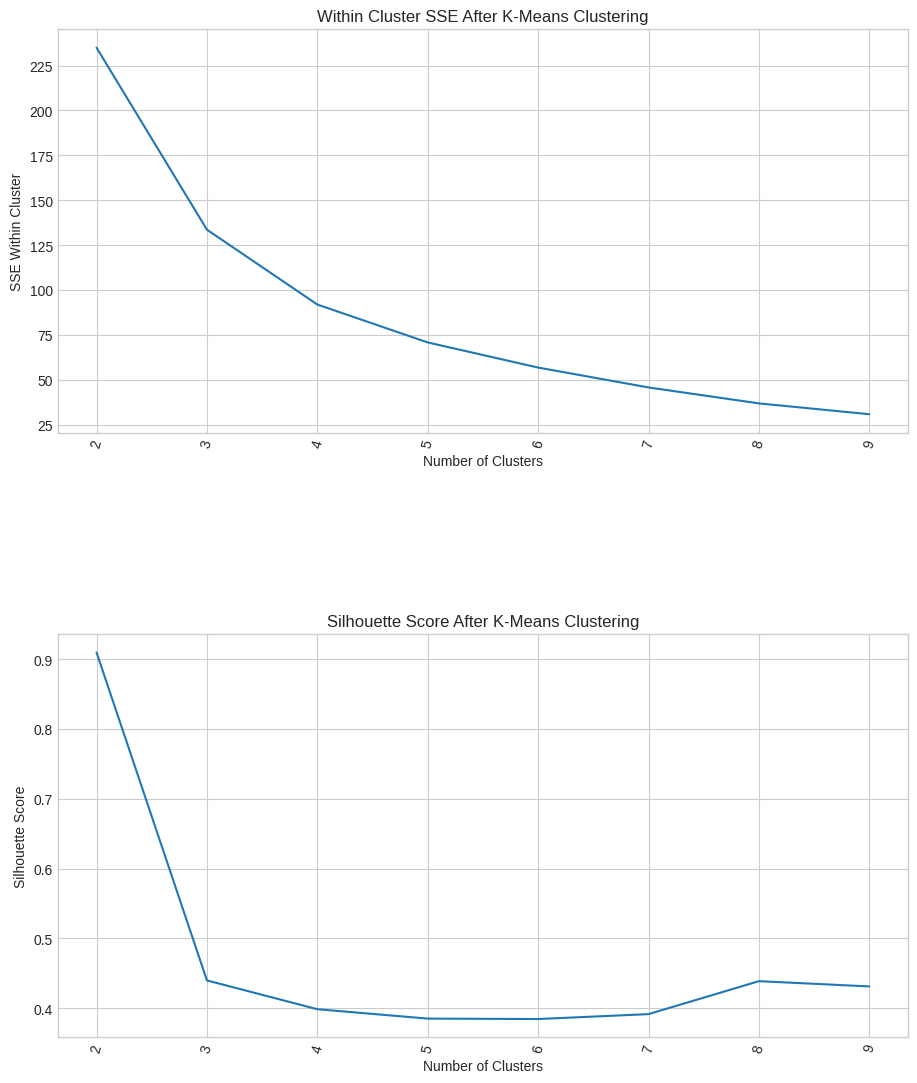

In [222]:
data2 = data.query("KMeans_Cluster == 1").reset_index(drop=True)
data2.info()

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

def plot_cluster(df, max_loop=50):

    # Specify the columns to use for clustering
    selected_columns = ['AGE', 'INCOME']
    X = df[selected_columns]

    # Robust scaling is used for the selected columns
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)

    sse_within_cluster = {}
    silhouette_score = {}

    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)  # Removed n_jobs
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    plt.figure(figsize=(10, 12))

    plt.subplot(211)
    plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE Within Cluster")
    plt.title("Within Cluster SSE After K-Means Clustering")
    plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplot(212)
    plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score After K-Means Clustering")
    plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

plot_cluster(data, max_loop=10)


Text(0.5, 1.0, 'K-Means Clustering')

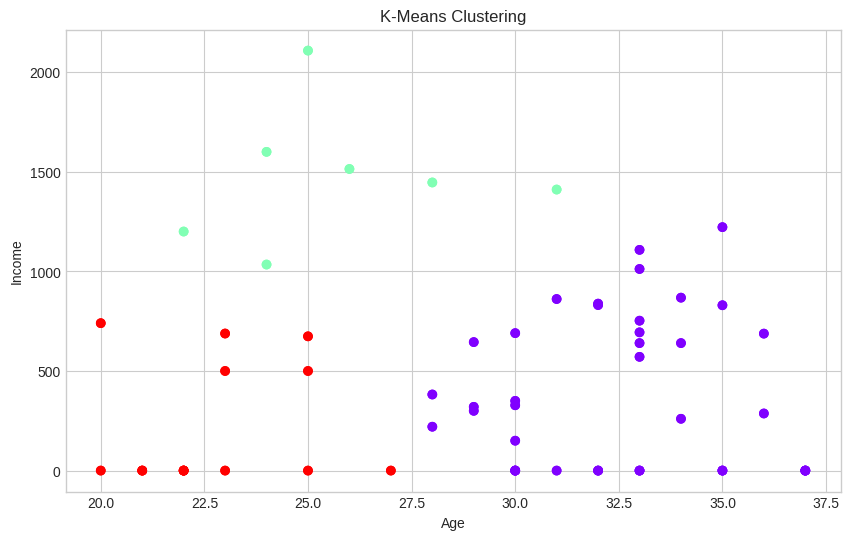

In [223]:

# Select relevant features for clustering in new dataset
X2 = data2[['AGE', 'INCOME']]

# Standardize the data
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)

# Perform K-Means Clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled2)

# Add the cluster labels to the dataset
# data2['KMeans_Cluster2'] = cluster_labels

# Visualization of K-Means Clusters
# ccmap = plt.get_cmap('tab20')
plt.figure(figsize=(10, 6))
plt.scatter(X2['AGE'], X2['INCOME'], c=cluster_labels,cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-Means Clustering')

# # Add color labels for clusters
# for i in range(cluster_labels.max()+1):
#     plt.scatter([], [], label='Cluster {}'.format(i), color=ccmap(i))

# plt.legend()



*Golden cluster:*


We see that the cluster with ages 28 to 37 is where most homeless peple are saturated with similar income. This should be the targetted group for intervention

## *Classification*

Re-importing data and doing visualization and data processing for classification

In [224]:
id='17kcPvYhMKwEarS1978L5vuSwOa9x_SKN'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('homelessProfiles.csv')
df = pd.read_csv('homelessProfiles.csv')

In [225]:
df = df.dropna()
df = df.drop(['CLIENT_KEY','required'],axis=1)

# First, create dummy columns from the Veteran, assistance type received and Sex columns
SexColumnDummy = pd.get_dummies(df['GENDER'])
VeteranColumnDummy = pd.get_dummies(df['VETERAN'])
assistanceColumnDummy = pd.get_dummies(df['assistancetype'])

df = pd.concat((df, SexColumnDummy, VeteranColumnDummy, assistanceColumnDummy), axis=1)

# Drop the redundant columns thus converted
df = df.drop(['GENDER','VETERAN', 'assistancetype'],axis=1)

Check and drop co-linear variables

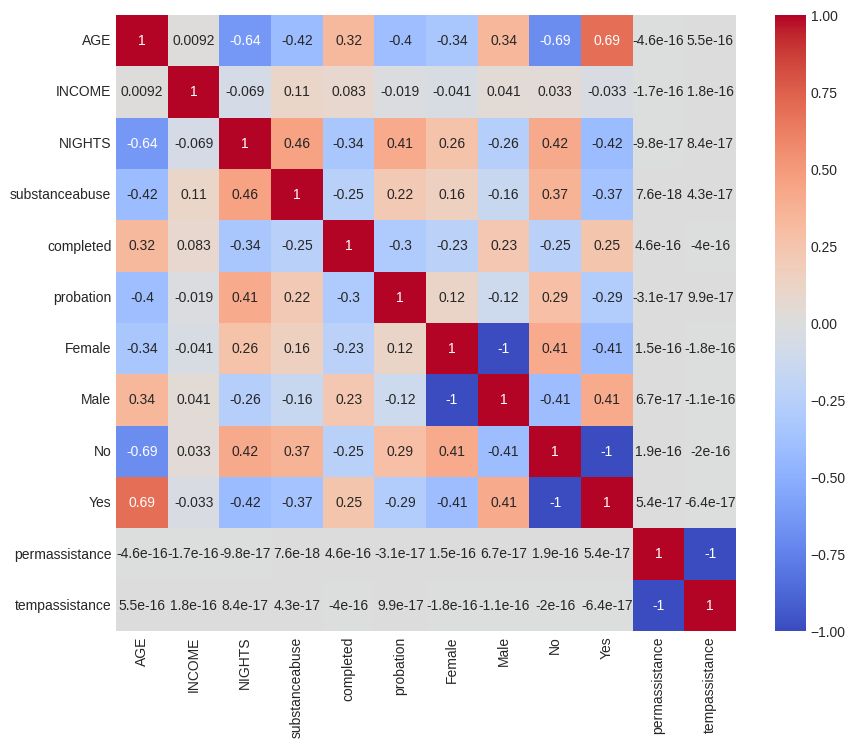

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [227]:
df = df.drop(['No','Female', 'tempassistance'],axis=1)

In [228]:
# Saving df for later use
dataDistDf = df
dataDistDf.head()

,AGE,INCOME,NIGHTS,substanceabuse,completed,probation,Male,Yes,permassistance
0,20,0.0,152.0,0,0,1,0,0,0
1,20,740.0,229.0,0,1,0,0,0,0
2,21,0.0,105.0,1,1,0,0,0,0
3,21,0.0,371.0,1,1,0,0,0,0
4,22,0.0,169.0,0,0,0,0,0,0


In [229]:
# Extract y from the dataframe
y = df['substanceabuse'].values
df = df.drop(['substanceabuse'],axis=1)

Utilities (definitions) for amalgamation

In [230]:
import re

# Function to parse age ranges and expand them into individual ages
def expand_age_range(age_range):
    ages = []
    # Use regular expressions to extract age values from the range
    age_pattern = r'(\d+)-(\d+)'
    match = re.match(age_pattern, age_range)
    if match:
        start_age = int(match.group(1))
        end_age = int(match.group(2))
        ages.extend(range(start_age, end_age + 1))
    else:
        # If it's not a range, convert it to an integer
        ages.append(int(age_range))
    return ages


Load dataset 2 and 3

In [231]:
ds2_id='1fGutkv7fZMgLFvbcVIY8EMeup7kOGYoq'
ds3_id ='1gRy3dwSZgP5kCq0fFfjkS92p_vHVa0nt'

dataset2 = drive.CreateFile({'id':ds2_id})
dataset2.GetContentFile('drugUse.csv')
dfDrug = pd.read_csv('drugUse.csv')

ds3 = drive.CreateFile({'id':ds3_id})
ds3.GetContentFile('drugFrequency.csv')
dfFreq = pd.read_csv('drugFrequency.csv')

In [232]:
selected_columns = ['age','alcohol-use','marijuana-use']  # column names to keep
# drop remaining columns
dfDrug = dfDrug[selected_columns]
dfDrug.head(10)

,age,alcohol-use,marijuana-use
0,20,69.7,34.0
1,21,83.2,33.0
2,22-23,84.2,28.4
3,24-25,83.1,24.9
4,26-29,80.7,20.8
5,30-34,77.5,16.4
6,35-49,75.0,10.4
7,50-64,67.2,7.3
8,65-79,49.3,1.2


Merge datasets

In [233]:
# Expand age ranges in drug dataset
dfDrug['age'] = dfDrug['age'].apply(expand_age_range)

# Explode (unnest) the age column to create separate rows for each age
dfDrug = dfDrug.explode('age')

# Rename the 'age' column to match the column name in df
dfDrug = dfDrug.rename(columns={'age': 'AGE'})

# Merge the datasets based on the 'AGE' column
df_interim = pd.merge(df, dfDrug, on='AGE', how='left')

# Expand age ranges in frequency dataset
dfFreq['age'] = dfFreq['age'].apply(expand_age_range)

# Explode (unnest) the age column to create separate rows for each age
dfFreq = dfFreq.explode('age')

# Rename the 'age' column to match the column name in df
dfFreq = dfFreq.rename(columns={'age': 'AGE'})

# Merge the datasets based on the 'AGE' column
merged_df = pd.merge(df_interim, dfFreq, on='AGE', how='left')

<ipython-input-233-7ac495b2fea8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDrug['age'] = dfDrug['age'].apply(expand_age_range)


In [234]:
# Extract the X dataframes for each amalgamation
X1 = df.values
X2 = df_interim.values
X3 = merged_df.values

Muller loop for classifiers on all datasets

In [235]:

import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# Define a list of dataset names
dataset_names = ["ds1", "ds1+ds2", "ds1+ds2+ds3"]

# Create a list of datasets
datasets = [X1, X2, X3]

# Define the classifiers
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["Dataset"] )

max_score = 0.0
max_class = ''

# Loop over datasets
for i, ds in enumerate(datasets):
    newX = StandardScaler().fit_transform(ds)
    X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=.2)
    row_data = []
    row_data.append(dataset_names[i])
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        start_time = time.time()
        clf.fit(X_train, y_train)
        score = 100.0 * clf.score(X_test, y_test)
        training_time = time.time() - start_time

        row_data.append(score)

        if score > max_score:
          clf_best = clf
          max_score = score
          max_class = name

    # append best performer at end of each row
    best_perf = str(max_class) + " " + str(max_score)
    row_data.append(best_perf)

    # append row data to the result table dataframe
    results_df = results_df.append(pd.Series(row_data, index=["Dataset"] + names + ["Best Performer"]), ignore_index=True)

# Display the results DataFrame
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
<ipython-input-235-7888159741c2>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.Series(row_data, index=["Dataset"] + names + ["Best Performer"]), ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
<ipython-input-235-7888159741c2>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.Series(row_data, index=["Dataset"] + names + ["Best Performer"]), ignore_index=True)


       Dataset  Nearest Neighbors  Linear SVM    RBF SVM  Decision Tree  \
0          ds1          70.833333   66.666667  64.583333      87.500000   
1      ds1+ds2          79.166667   81.250000  70.833333      83.333333   
2  ds1+ds2+ds3          64.583333   64.583333  64.583333      83.333333   

   Random Forest  Neural Net   AdaBoost  Naive Bayes        QDA  \
0      89.583333   72.916667  93.750000    47.916667  47.916667   
1      81.250000   75.000000  87.500000    41.666667  43.750000   
2      77.083333   70.833333  89.583333    56.250000  66.666667   

   Best Performer  
0  AdaBoost 93.75  
1  AdaBoost 93.75  
2  AdaBoost 93.75  


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
<ipython-input-235-7888159741c2>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.Series(row_data, index=["Dataset"] + names + ["Best Performer"]), ignore_index=True)


Best classifier is shown in the last column of the output table above

## *Changing Data Distribution and Visualizing*

Feature Importance

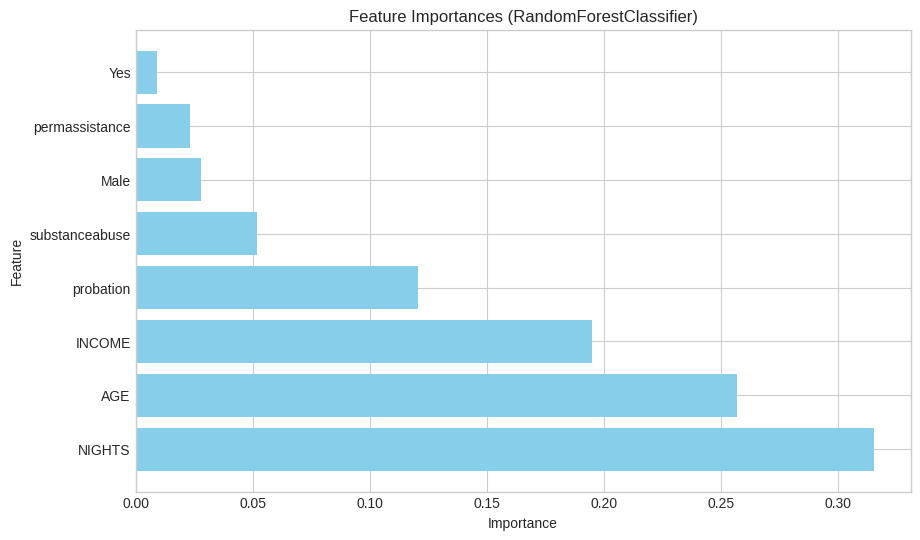

In [236]:
from sklearn.metrics import f1_score

X = dataDistDf.drop(columns=['completed'])
y = dataDistDf['completed']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)
baseline_f1_score = f1_score(y_test, y_pred)

feature_importances = baseline_model.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

# Set plot labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (RandomForestClassifier)')

# Show the plot
plt.show()

In [237]:
!pip install hvplot

Upsample And Downsample, Muller Loop Definitions


In [238]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

def upsample_dataset(X_train, y_train):
    # Apply SMOTE to upsample the minority class
    smote = SMOTE(sampling_strategy='minority')
    upsampled_X_train, upsampled_y_train = smote.fit_resample(X_train, y_train)
    return upsampled_X_train, upsampled_y_train

def downsample_dataset(X_train, y_train):
    # Apply Edited Nearest Neighbours to downsample the majority class
    enn = EditedNearestNeighbours(sampling_strategy='majority')
    downsampled_X_train, downsampled_y_train = enn.fit_resample(X_train, y_train)
    return downsampled_X_train, downsampled_y_train

import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import holoviews as hv
from sklearn.metrics import f1_score, confusion_matrix

# Define the classifiers
names = ["Nearest Neighbors", "Linear SVM", "Decision Tree",
        "Random Forest", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier()]


def runClassifierMullerLoop(X, y, feature_choice="NIGHTS"):

  max_score = 0.0
  max_class = ''
  scatter_list = []
  confusion_matrix_list = []

  newX = StandardScaler().fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=.2)

  # iterate over classifiers
  for name, clf in zip(names, classifiers):
      start_time = time.time()
      clf.fit(X_train, y_train)
      training_time = time.time() - start_time

      score = 100.0 * clf.score(X_test, y_test)
      y_pred = clf.predict(X_test)
      f1 = f1_score(y_test, y_pred)
      cm = confusion_matrix(y_test, y_pred)
      confusion_matrix_list.append(cm)

      if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

      scatter = hv.Scatter((training_time, f1), 'Training Time', 'F1 Score').opts(
            width=900, height=300, size=10, title='F1 changed distribution using ' + feature_choice
        ).redim.label(Training_Time='Training time', F1_Score='F1 Score')
      scatter_list.append(scatter * hv.Text(training_time, f1, name))

  # Combine all scatter plots
  plot = hv.Overlay(scatter_list).opts(legend_position='top')

  return plot, confusion_matrix_list

Column
    [0] Markdown(str)
    [1] Select(name='Feature Selection', options=['INCOME', 'NIGHTS'], value='INCOME')
    [2] DiscreteSlider(formatter='%d', name='Distribution', options={'Downsampled': -1, ...}, value=-1)
    [3] HoloViews(Overlay, height=300, sizing_mode='fixed', width=900)
    [4] ParamFunction(function, _pane=Str, defer_load=False)
    [5] Matplotlib(Figure)
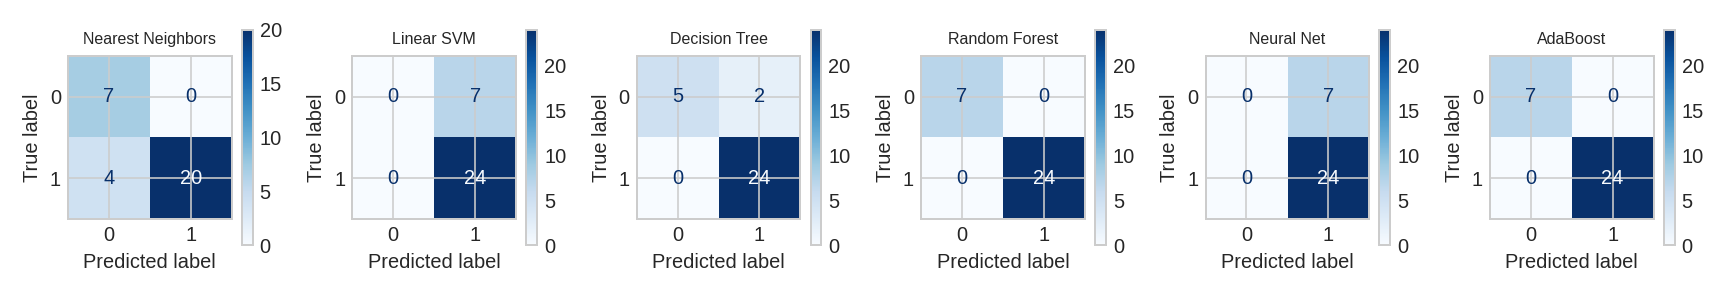

In [239]:
import warnings
# Set the warning filter to "ignore"
# warnings.filterwarnings("ignore")

import hvplot.pandas
import panel as pn
from sklearn.metrics import ConfusionMatrixDisplay


# Define a function to update the plot and model
def update_plot(feature_select, distribution_slider):

    global X, y, classifiers
    Xdash = X[[feature_select]]
    if distribution_slider == -1:
        X_resampled, y_resampled = downsample_dataset(Xdash, y)
    elif distribution_slider == 1:
        X_resampled, y_resampled = upsample_dataset(Xdash, y)
    else:
        X_resampled = X_train
        y_resampled = y_train

    hv_plot, confusion_matrices = runClassifierMullerLoop(X_resampled, y_resampled, feature_select)
    graphs.object = hv_plot
    fig, axs = plt.subplots(1, len(classifiers), figsize=(12, 2))
    for i, cm in enumerate(confusion_matrices):
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
        disp.plot(cmap=plt.cm.Blues, ax=axs[i])
        axs[i].set_title(names[i], fontsize=8)
    plt.tight_layout()
    confusion_matrix_pane.object = fig
    # plt.show()
    plt.close(fig)


# Create a Panel widget for selecting the data distribution
feature_select = pn.widgets.Select(options= ['INCOME','NIGHTS'], value='INCOME', name='Feature Selection')
distribution_slider = pn.widgets.DiscreteSlider(name='Distribution', options={'Downsampled': -1, 'Original': 0, 'Upsampled': 1})
graphs = pn.pane.HoloViews()
confusion_matrix_pane = pn.pane.Matplotlib()

# Define the Panel app layout
@pn.depends(feature_select,distribution_slider)
def plot(feature_select,distribution_slider):
    return update_plot(feature_select,distribution_slider)

app = pn.Column(
    '# Data Distribution Dashboard',
    feature_select,
    distribution_slider,
    graphs,
    plot,
    confusion_matrix_pane
)
app.servable()


## *Regression*

Load fresh data for regression

In [240]:
id='1RjuRaiPRm6Cc5ibxhd6Y939Dy8E5OyOL'
avgWageStatewise = '1P7d8xL69dWMMB3BIYpWMzr-hchuxgasm'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('homeless_profiles.csv')
data = pd.read_csv('homeless_profiles.csv')
data.info()

download2 = drive.CreateFile({'id':avgWageStatewise})
download2.GetContentFile('avgWageStatewise.csv')
wageData = pd.read_csv('avgWageStatewise.csv')
wageData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CLIENT_KEY      242 non-null    int64  
 1   AGE             242 non-null    int64  
 2   GENDER          242 non-null    object 
 3   VETERAN         242 non-null    object 
 4   INCOME          242 non-null    float64
 5   NIGHTS          236 non-null    float64
 6   substanceabuse  242 non-null    int64  
 7   completed       242 non-null    int64  
 8   probation       242 non-null    int64  
 9   assistancetype  242 non-null    object 
 10  required        242 non-null    int64  
 11  State           242 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 22.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    50 non-null  

 **Latent variable:**


**Articles used to understand impact of latent variables**

https://endhomelessness.org/blog/employed-and-experiencing-homelessness-what-the-numbers-show/

https://siepr.stanford.edu/publications/policy-brief/homelessness-california-causes-and-policy-considerations

https://www.mckinsey.com/industries/public-sector/our-insights/the-ongoing-crisis-of-homelessness-in-the-bay-area-whats-working-whats-not


**Our Thought Process:**


* From the articles, we could determine that housing prices of every state play a crucial role in the probability of an individual going homeless

* We manually scraped a dataset from the first link above to get average state-wise wages that an individual has to be earn to be able to own/rent a house in that state.

* Then, we have joined the new dataset with our base dataset by the 'state' (California, Arizona, ..) values for each individual in the base dataset

* This helped in computing a new feature that will show the ability of the homeless individual to own a home in his respective state.

* We have added this feature as a columm in our amalgamated dataset and compare outcome of regression (before and after adding).



Joining datasets on 'state'

In [241]:
# join wage data by states
selected_columns = wageData[['State', 'Wage']]
data = data.merge(selected_columns, on='State', how='left')
print(data)

#compute a new feature and add as a column
data['owningAbility'] = np.where(data['INCOME'] == 0, 0, data['INCOME'] / data['Wage'])
data.head()

     CLIENT_KEY  AGE  GENDER VETERAN   INCOME  NIGHTS  substanceabuse  \
0        256172   20  Female      No     0.00   152.0               0   
1        221079   20  Female      No   740.00   229.0               0   
2        243074   21  Female      No     0.00   105.0               1   
3        129974   21  Female      No     0.00   371.0               1   
4        226596   22  Female      No     0.00   169.0               0   
..          ...  ...     ...     ...      ...     ...             ...   
237      204806   77    Male     Yes     0.00    12.0               0   
238      320878   77  Female     Yes  1331.02    25.0               0   
239      213114   79    Male     Yes  2100.00    11.0               0   
240      258969   79  Female     Yes   694.00    16.0               0   
241       84396   79  Female     Yes     0.00    22.0               0   

     completed  probation  assistancetype  required          State   Wage  
0            0          1  tempassistance      

,CLIENT_KEY,AGE,GENDER,VETERAN,INCOME,NIGHTS,substanceabuse,completed,probation,assistancetype,required,State,Wage,owningAbility
0,256172,20,Female,No,0.0,152.0,0,0,1,tempassistance,1,Arizona,29.93,0.000000
1,221079,20,Female,No,740.0,229.0,0,1,0,tempassistance,1,Louisiana,19.39,38.164002
2,243074,21,Female,No,0.0,105.0,1,1,0,tempassistance,1,Washington,36.33,0.000000
3,129974,21,Female,No,0.0,371.0,1,1,0,tempassistance,1,Vermont,25.54,0.000000
4,226596,22,Female,No,0.0,169.0,0,0,0,tempassistance,1,Idaho,21.53,0.000000




Multi-Layer Perceptron (MLP) neural network using Keras

In [242]:

from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add additional hidden layers (customize as needed)
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))  # For binary classification, change activation as needed

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust epochs and batch size as needed

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/10
6/6 [==============================] - 3s 11ms/step - loss: 16.2588 - accuracy: 0.4000
Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 2.9748 - accuracy: 0.8182
Epoch 3/10
6/6 [==============================] - 0s 6ms/step - loss: 3.4267 - accuracy: 0.8182
Epoch 4/10
6/6 [==============================] - 0s 6ms/step - loss: 2.6385 - accuracy: 0.8424
Epoch 5/10
6/6 [==============================] - 0s 6ms/step - loss: 1.2924 - accuracy: 0.8485
Epoch 6/10
6/6 [==============================] - 0s 12ms/step - loss: 1.0949 - accuracy: 0.6424
Epoch 7/10
6/6 [==============================] - 0s 8ms/step - loss: 0.9741 - accuracy: 0.8545
Epoch 8/10
6/6 [==============================] - 0s 5ms/step - loss: 0.7944 - accuracy: 0.8242
Epoch 9/10
6/6 [==============================] - 0s 7ms/step - loss: 0.6373 - accuracy: 0.7152
Epoch 10/10
3/3 [==============================] - 0s 6ms/step - loss: 1.4415 - accuracy: 0.7606
Test Loss: 1.441475510597229, Test A

The left plot shows the training and validation loss over epochs, helping to visualize how the loss changes during training.


The right plot shows the training and validation accuracy over epochs, providing insights into the model's performance.

Epoch 1/10
6/6 [==============================] - 2s 131ms/step - loss: 3.3032 - accuracy: 0.6606 - val_loss: 4.9509 - val_accuracy: 0.2817
Epoch 2/10
6/6 [==============================] - 0s 44ms/step - loss: 1.5877 - accuracy: 0.6364 - val_loss: 3.3604 - val_accuracy: 0.7606
Epoch 3/10
6/6 [==============================] - 0s 45ms/step - loss: 1.9127 - accuracy: 0.8606 - val_loss: 3.9548 - val_accuracy: 0.7606
Epoch 4/10
6/6 [==============================] - 0s 36ms/step - loss: 1.9144 - accuracy: 0.8606 - val_loss: 2.7276 - val_accuracy: 0.7606
Epoch 5/10
6/6 [==============================] - 0s 16ms/step - loss: 1.1613 - accuracy: 0.8303 - val_loss: 0.7867 - val_accuracy: 0.7606
Epoch 6/10
6/6 [==============================] - 0s 19ms/step - loss: 0.6356 - accuracy: 0.7091 - val_loss: 0.8226 - val_accuracy: 0.7606
Epoch 7/10
6/6 [==============================] - 0s 15ms/step - loss: 0.6714 - accuracy: 0.8485 - val_loss: 0.4816 - val_accuracy: 0.7746
Epoch 8/10
6/6 [==========

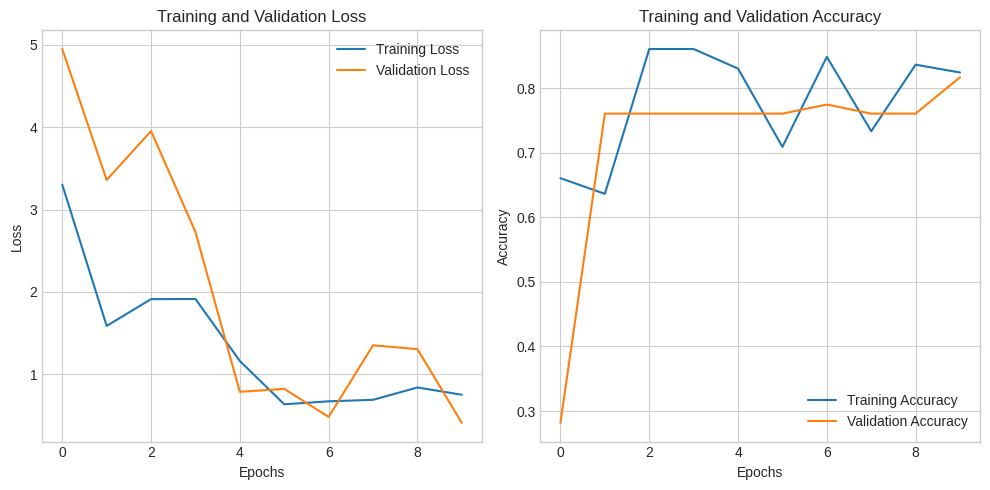

In [243]:
# Define the neural network model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add additional hidden layers (customize as needed)
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))  # For binary classification, change activation as needed

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()


Regression Muller Loop: MLPRegressor, LinearRegression, RandomForestRegressor, KNNRegressor, XBoost Regressor

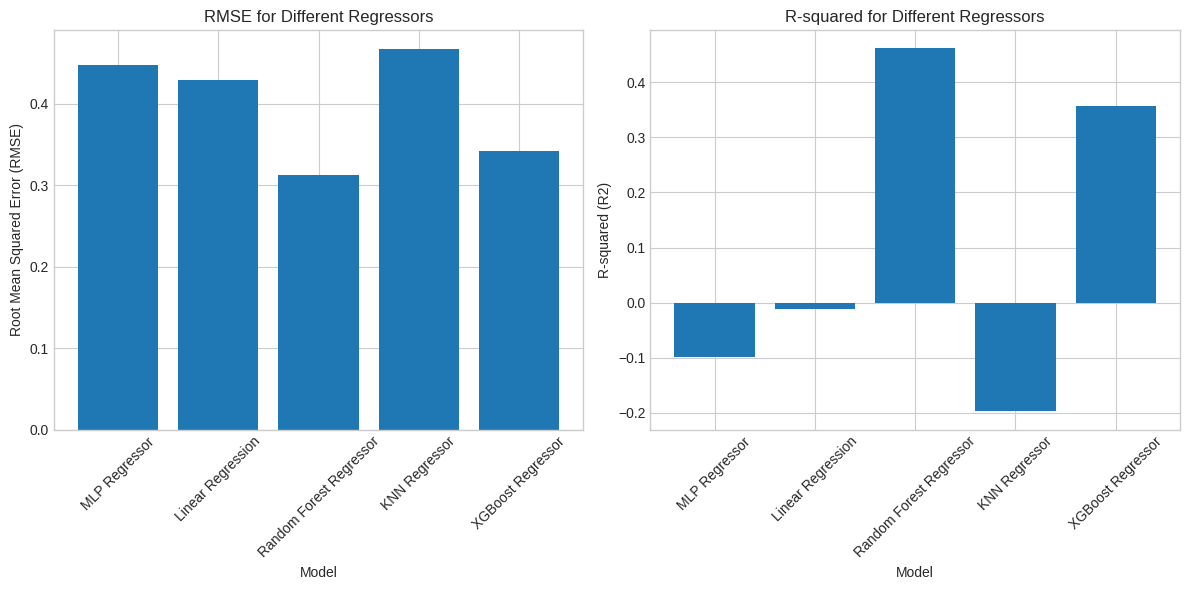

In [244]:

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a dictionary of regression models
models = {
    "MLP Regressor": MLPRegressor(),
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

# Initialize lists to store model names, RMSE, and R-squared values
model_names = []
rmse_values = []
r2_values = []

# Iterate through the models
for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate RMSE and R-squared
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Append results to lists
    model_names.append(name)
    rmse_values.append(rmse)
    r2_values.append(r2)

# Plot RMSE and R-squared for each model with rotated x-axis labels
plt.figure(figsize=(12, 6))  # Increase the figure size
plt.subplot(1, 2, 1)
plt.bar(model_names, rmse_values)
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE for Different Regressors')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility

plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values)
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('R-squared for Different Regressors')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility

plt.tight_layout()
plt.show()


# DATA NARRATIVE & CONCLUSION


---



Our project, "Anticipating Homelessness: A Machine Learning Approach To Prediction," revolved around a comprehensive dataset comprising the profiles of homeless individuals. This dataset included essential attributes, such as age, gender, income, veteran status, and crucially, histories of drug abuse.



## Some challenges encountered with data availability:

Our pursuit of knowledge encountered a few challenges. Access to individual profile data proved to be a significant hurdle due to privacy-related concerns. As such, we initially explored aggregated data obtained from government and NGO sources, but it was not amenable to the experiments we had in mind.

Thus, we resorted to a Kaggle repository, which provided us with our base dataset. Additionally, we gathered raw data through web scraping, culminating in four distinct datasets for our analyses. The challenges of data amalgamation proved fruitful as they significantly improved the performance of our classifiers and provided a more comprehensive view of the homeless population.

Nonetheless, our data has yielded valuable insights and highlights the potential of data-driven approaches in addressing this pressing social issue. By applying clustering, classification, and regression techniques to our diverse datasets, we have made meaningful contributions to the understanding and mitigation of homelessness.

## *We answered fundamental questions by conducting experiments that revealed critical insights:*

* Commonalities Among Homeless Individuals: Our clustering efforts helped identify distinct groups within the homeless population, shedding light on common characteristics and vulnerabilities. These findings can inform targeted interventions and support for 'at-risk' groups, fostering more effective assistance.
For example, most homeless individuals have a similar income range and are concentrated in the 30-40 range. These are the characteristics that can be associated with individuals prone to being homelessness. NGOs or other public organizations can target these mid-aged adults in communities and provide them with opportunities for a livelihood in order to circumvent an increase in the homeless popolation.

* Based on the metrices shown for the logistic regression model and most of the regressors above, it is clear that the profile (age, income, substance abuse, and so on) information of each homeless individual played a key role in determining whether or not this person remained homeless (completed column)

* Impact of Drug Abuse: Our classification analysis elucidated the intricate relationship between drug abuse and homelessness. Understanding these patterns can aid in the development of intervention strategies to address this critical concern and support individuals in improving their conditions.
The amalgamation of datasets, especially incorporating drug usage information and housing affordability data, significantly enhanced the performance of our classifiers, offering a more comprehensive perspective on homelessness.


## Conclusion:

Our project underscores the potential of machine learning as a tool to anticipate and address homelessness.

The insights gained from this work can inform policies, community efforts, and support systems, ultimately leading to more effective solutions for this pressing societal issue. By harnessing the power of data-driven approaches, we can contribute to the betterment of our community and the welfare of all its members.